In [9]:
from skimage.util import random_noise
from skimage.restoration import denoise_nl_means, estimate_sigma
import numpy as np
from matplotlib import pyplot as plt
import tifffile
import os
from skimage.metrics import structural_similarity as ssim

from denoise import denoiser
import tifffile


In [2]:
def PSNR(gt, img):
    mse = np.mean(np.square(gt - img))
    return 20 * np.log10(np.max(gt)-np.min(gt)) - 10 * np.log10(mse)

In [3]:
def add_noise(image, image_path):
    mean = 0
    sigma = 0.2
    gaussian = np.random.normal(mean, sigma, (image.shape[0],image.shape[1])) 

    noisy = image + gaussian
    noisy = (noisy - np.min(noisy))/(np.max(noisy) - np.min(noisy))

    tifffile.imsave(image_path, noisy)

    return noisy

(1200, 1200)


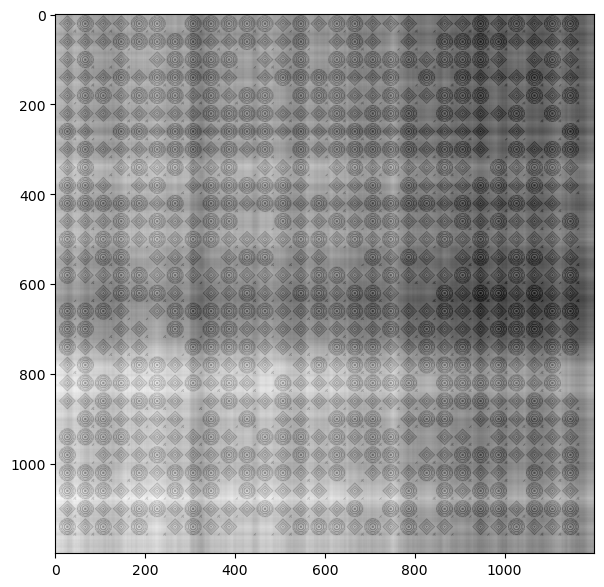

In [3]:
# Open the image file
img = tifffile.imread("./../sample_img/img_v2.tiff")
print(img.shape)
img = (img - np.min(img))/(np.max(img) - np.min(img))

# Display the image
plt.figure(figsize=(7,7))
plt.imshow(img, cmap = 'gray')

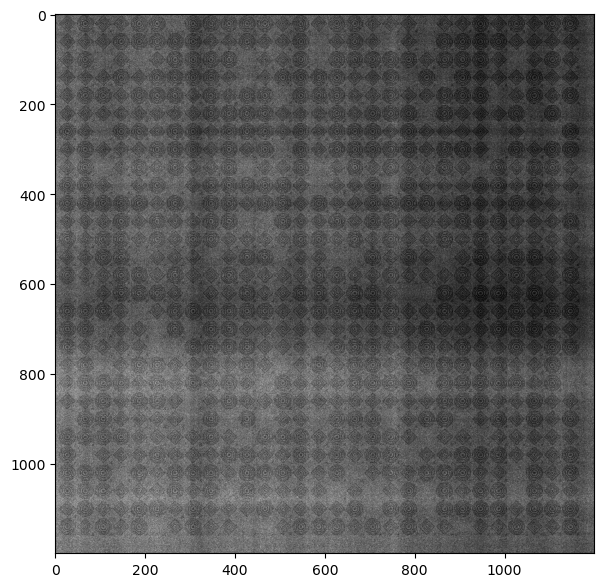

In [4]:
noisy = tifffile.imread("./../sample_img/noisy_img_v2.tiff")
# noisy = add_noise(img, "")
noisy = (noisy - np.min(noisy))/(np.max(noisy) - np.min(noisy))

plt.figure(figsize=(7,7))
plt.imshow(noisy, cmap='gray')


In [6]:
#  Noisy image

psnr_noisy = PSNR(img, noisy)
print(psnr_noisy)

ssim_noisy = ssim(img, noisy, data_range=1)
print(ssim_noisy)


12.12252665359648
0.4403359820295103


In [53]:
patch_size = 40
denoised = denoiser(noisy, clustering_factor=4.5,max_patches_per_class=100, termination_number=5, patch_size=patch_size)

tifffile.imsave("./../sample_img/denoiser_denoised_trdt.tiff", denoised)

[[87, 98], [182, 351], [226, 423], [371, 560], [395, 468], [540, 958], [666, 710], [713, 165], [829, 584], [894, 552], [1006, 651], [1121, 750]]


Used 7781subimages
Used 7781subimages
Used 7781subimages


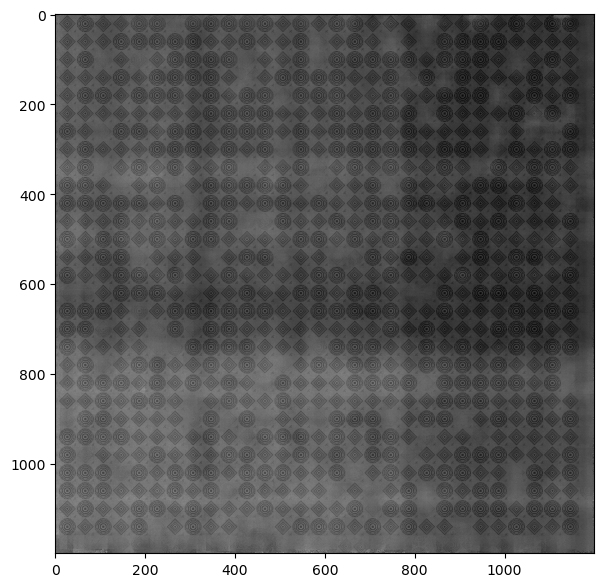

In [54]:
plt.figure(figsize=(7,7))
plt.imshow(denoised[0], cmap='gray')

In [58]:
denoised = tifffile.imread("./../sample_img/noisy_img_v2-denoised.tiff")

denoised = (denoised - np.min(denoised))/(np.max(denoised) - np.min(denoised))

psnr_denoiser = PSNR(img[patch_size//2:-patch_size//2,patch_size//2:-patch_size//2], denoised)#[0,patch_size//2:-patch_size//2,patch_size//2:-patch_size//2])
print(psnr_denoiser)

ssim_denoiser = ssim(img[patch_size//2:-patch_size//2,patch_size//2:-patch_size//2], denoised)#[0,patch_size//2:-patch_size//2,patch_size//2:-patch_size//2], data_range=1)
print(ssim_denoiser)

18.727218418878685
0.9005091477008201


In [56]:
denoised_n2v = tifffile.imread("./../sample_img/output_n2v.tif")

denoised_n2v = (denoised_n2v - np.min(denoised_n2v))/(np.max(denoised_n2v) - np.min(denoised_n2v))

psnr_denoiser = PSNR(img, denoised_n2v)
print(psnr_denoiser)

ssim_denoiser = ssim(img, denoised_n2v, data_range=1)
print(ssim_denoiser)

25.567397176577963
0.8412844106976998


In [41]:
noisy_nlm = noisy[...,np.newaxis]
sigma_est = np.mean(estimate_sigma(noisy_nlm, channel_axis=-1))
print(sigma_est)

patch_kw = dict(patch_size=40,      # 5x5 patches
                patch_distance=50,  # 13x13 search area
                channel_axis=-1)

denoised_nlm = denoise_nl_means(noisy_nlm, h=0.4 * sigma_est, fast_mode=True,
                           **patch_kw)
                           

0.09181940571025797


In [42]:
denoised_nlm = (denoised_nlm - np.min(denoised_nlm))/(np.max(denoised_nlm) - np.min(denoised_nlm))

psnr_nlm = PSNR(img, denoised_nlm)
print(psnr_nlm)

ssim_nlm = ssim(img, denoised_nlm, data_range=1)
print(ssim_nlm)

12.122545743908898
0.4403453560135909


In [40]:
tifffile.imsave("./../sample_img/noisy_img_v2-nlm.tiff", denoised_nlm)

In [16]:
# 18.324 & 0.3834
# data_dict = {
#         "img_folder": 'C:/Users/Anil Kumar/Downloads/paper_img/',
#         "results_dir" : "C:/Users/Anil Kumar/Downloads/paper_img/",
#         "img_name" : "paper_img.tiff",
#         "reruns" : 15,
#         "template_size" : 40,
#         "clustering_factor": 4,
#         "termination_number": 3,
#         "analyze": False,
#         "min_num_class": 5,
#         "max_num_class":200
#     }

#12.5495



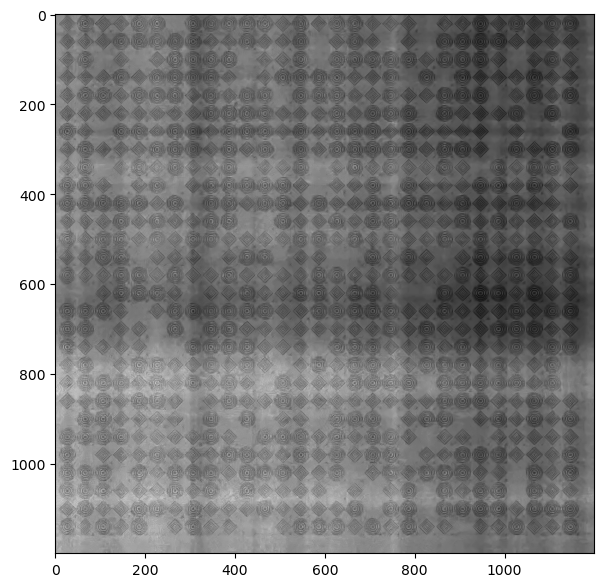

In [43]:
import bm3d

denoised_bm3d = bm3d.bm3d(noisy, sigma_psd = 0.075, stage_arg=bm3d.BM3DStages.ALL_STAGES)

denoised_bm3d = (denoised_bm3d - np.min(denoised_bm3d))/(np.max(denoised_bm3d) - np.min(denoised_bm3d))

plt.figure(figsize=(7,7))
plt.imshow(denoised_bm3d, cmap='gray')

# tifffile.imsave("C:/Users/Anil Kumar/Downloads/paper_img/paper_img-bm3d.tiff", denoised_bm3d)

In [44]:
psnr_bm3d = PSNR(img, denoised_bm3d)
print(psnr_bm3d)

ssim_bm3d = ssim(img, denoised_bm3d, data_range=1)
print(ssim_bm3d)

17.158691208418364
0.6649597600250963


In [45]:
tifffile.imsave("./../sample_img/noisy_img_v2_bm3d.tiff", denoised_bm3d)

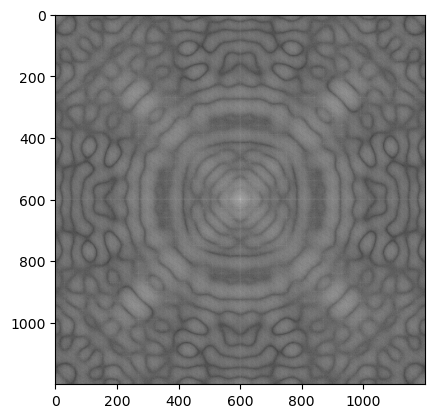

In [14]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))), cmap="gray")
img_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(img))))
tifffile.imsave("./../sample_img/img_v2_fft.tif",img_fft)

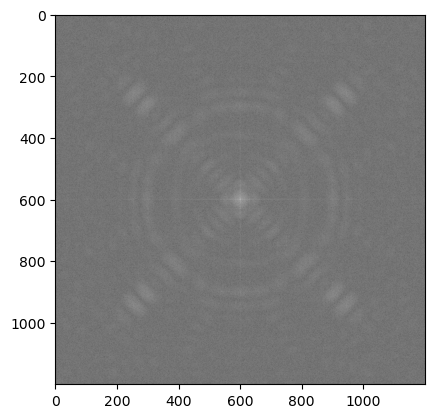

In [15]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(noisy)))), cmap="gray")
img_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(noisy))))
tifffile.imsave("./../sample_img/noisy_img_v2_fft.tif",img_fft)

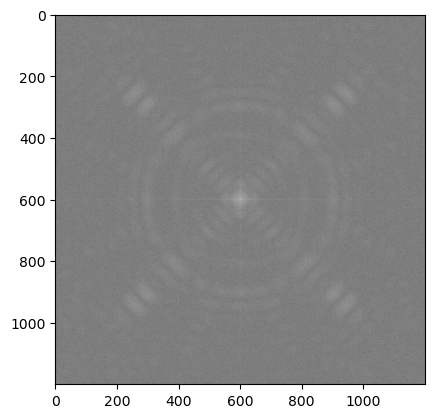

In [16]:
nlm = tifffile.imread("./../sample_img/noisy_img_v2-nlm.tiff")
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(nlm)))), cmap="gray")
img_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(nlm))))
tifffile.imsave("./../sample_img/noisy_img_v2-nlm_fft.tif",img_fft)

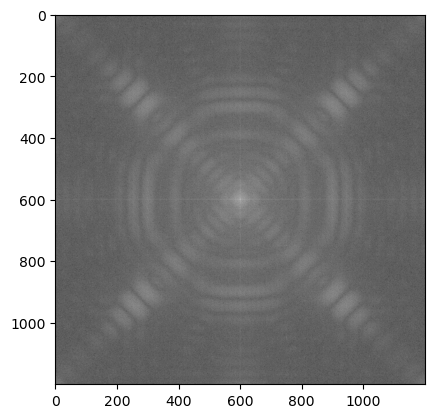

In [17]:
bm3d = tifffile.imread("./../sample_img/noisy_img_v2-bm3d.tiff")
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(bm3d)))), cmap="gray")
img_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(bm3d))))
tifffile.imsave("./../sample_img/noisy_img_v2-bm3d_fft.tif",img_fft)

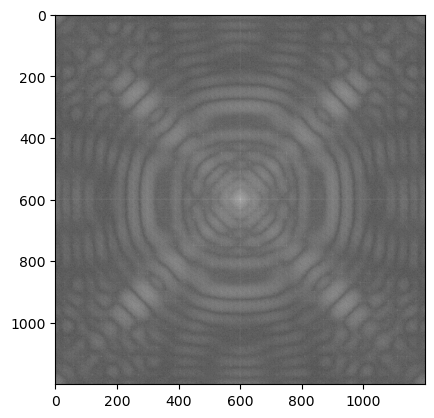

In [18]:
n2v = tifffile.imread("./../sample_img/output_n2v.tif")
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(n2v)))), cmap="gray")
img_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(n2v))))
tifffile.imsave("./../sample_img/noisy_img_v2-n2v_fft.tif",img_fft)

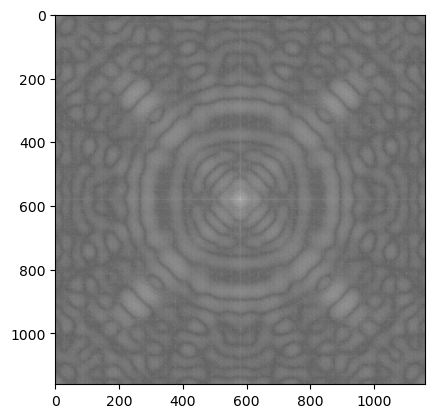

In [21]:
denoiser = tifffile.imread("./../sample_img/noisy_img_v2-denoised.tiff")
# denoiser = tifffile.imread("./../sample_img/output_n2v.tif")
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(denoiser)))), cmap="gray")
img_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(denoiser))))
tifffile.imsave("./../sample_img/noisy_img_v2-denoiser_fft.tif",img_fft)